# Importing libraries

In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV,KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

# PREPROCESSING

## Loading Data

In [2]:
#Loads the data in pandas dataframe
data=pd.read_csv('data.csv')
#Display data
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Data cleaning

In [3]:
#Detecting Missing Values
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
#drop the column that contains NaN
data=data.dropna(axis = "columns")
#Verify that there is no more NaN values
data.isnull().sum().sum()

0

## Data transformation

In [5]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
pd.DataFrame(data['diagnosis'].value_counts())

diagnosis
B        357
M        212

In [7]:
#turning categorical data to numerical
data = data.replace({'diagnosis':{'B':0, 'M':1}})
pd.DataFrame(data['diagnosis'].value_counts())

diagnosis
0        357
1        212

In [9]:
#feature scaling
scaler = MinMaxScaler()
selected_columns = data.columns[data.max() != 1]
data[selected_columns] = scaler.fit_transform(data[selected_columns])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:, 3:] = scaler.fit_transform(data.iloc[:, 3:])


#remove outliers
z_scores = stats.zscore(data)
data_no_outliers = data[(z_scores < 3 ).all(axis=1)]

data

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0    0.000915          1     0.521037     -2.073335        1.269934   
1    0.000915          1     0.643144     -0.353632        1.685955   
2    0.092495          1     0.601496      0.456187        1.566503   
3    0.092547          1     0.210090      0.253732       -0.592687   
4    0.092559          1     0.629893     -1.151816        1.776573   
..        ...        ...          ...           ...             ...   
564  0.001007          1     0.690000      0.721473        2.060786   
565  0.001007          1     0.622320      2.085134        1.615931   
566  0.001008          1     0.455251      2.045574        0.672676   
567  0.001008          1     0.644564      2.336457        1.982524   
568  0.000092          0     0.036869      1.221792       -1.814389   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     0.984375         1.568466          3.283515        2.652874   
1     1.908708        -0.826962         -0.487072       -0.023846   
2     1.558884         0.942210          1.052926        1.363478   
3    -0.764464         3.283553          3.402909        1.915897   
4     1.826229         0.280372          0.539340        1.371011   
..         ...              ...               ...             ...   
564   2.343856         1.041842          0.219060        1.947285   
565   1.723842         0.102458         -0.017833        0.693043   
566   0.577953        -0.840484         -0.038680        0.046588   
567   1.735218         1.525767          3.272144        3.296944   
568  -1.347789        -3.112085         -1.150752       -1.114873   

     concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0               2.532475  ...      1.886690      -1.359293         2.303601   
1               0.548144  ...      1.805927      -0.369203         1.535126   
2               2.037231  ...      1.511870      -0.023974         1.347475   
3               1.451707  ...     -0.281464       0.133984        -0.249939   
4               1.428493  ...      1.298575      -1.466770         1.338539   
..                   ...  ...           ...            ...              ...   
564             2.320965  ...      1.901185       0.117700         1.752563   
565             1.263669  ...      1.536720       2.047399         1.421940   
566             0.105777  ...      0.561361       1.374854         0.579001   
567             2.658866  ...      1.961239       2.237926         2.303601   
568            -1.261820  ...     -1.410893       0.764190        -1.432735   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2.001237          1.307686           2.616665         2.109526   
1      1.890489         -0.375612          -0.430444        -0.146749   
2      1.456285          0.527407           1.082932         0.854974   
3     -0.550021          3.394275           3.893397         1.989588   
4      1.220724          0.220556          -0.313395         0.613179   
..          ...               ...                ...              ...   
564    2.015301          0.378365          -0.273318         0.664512   
565    1.494959         -0.691230          -0.394820         0.236573   
566    0.427906         -0.809587           0.350735         0.326767   
567    1.653171          1.430427           3.904848         3.197605   
568   -1.075813         -1.859019          -1.207552        -1.305831   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                2.296076        2.750622                 1.937015  
1                1.087084       -0.243890                 0.281190  
2                1.955000        1.152255                 0.201391  
3                2.175786        6.046041                 4.935010  
4                0.729259       -0.868353                -0.397100  
..                    ...             ...                      ...  
564              1.6

# Visualisation

<Axes: >

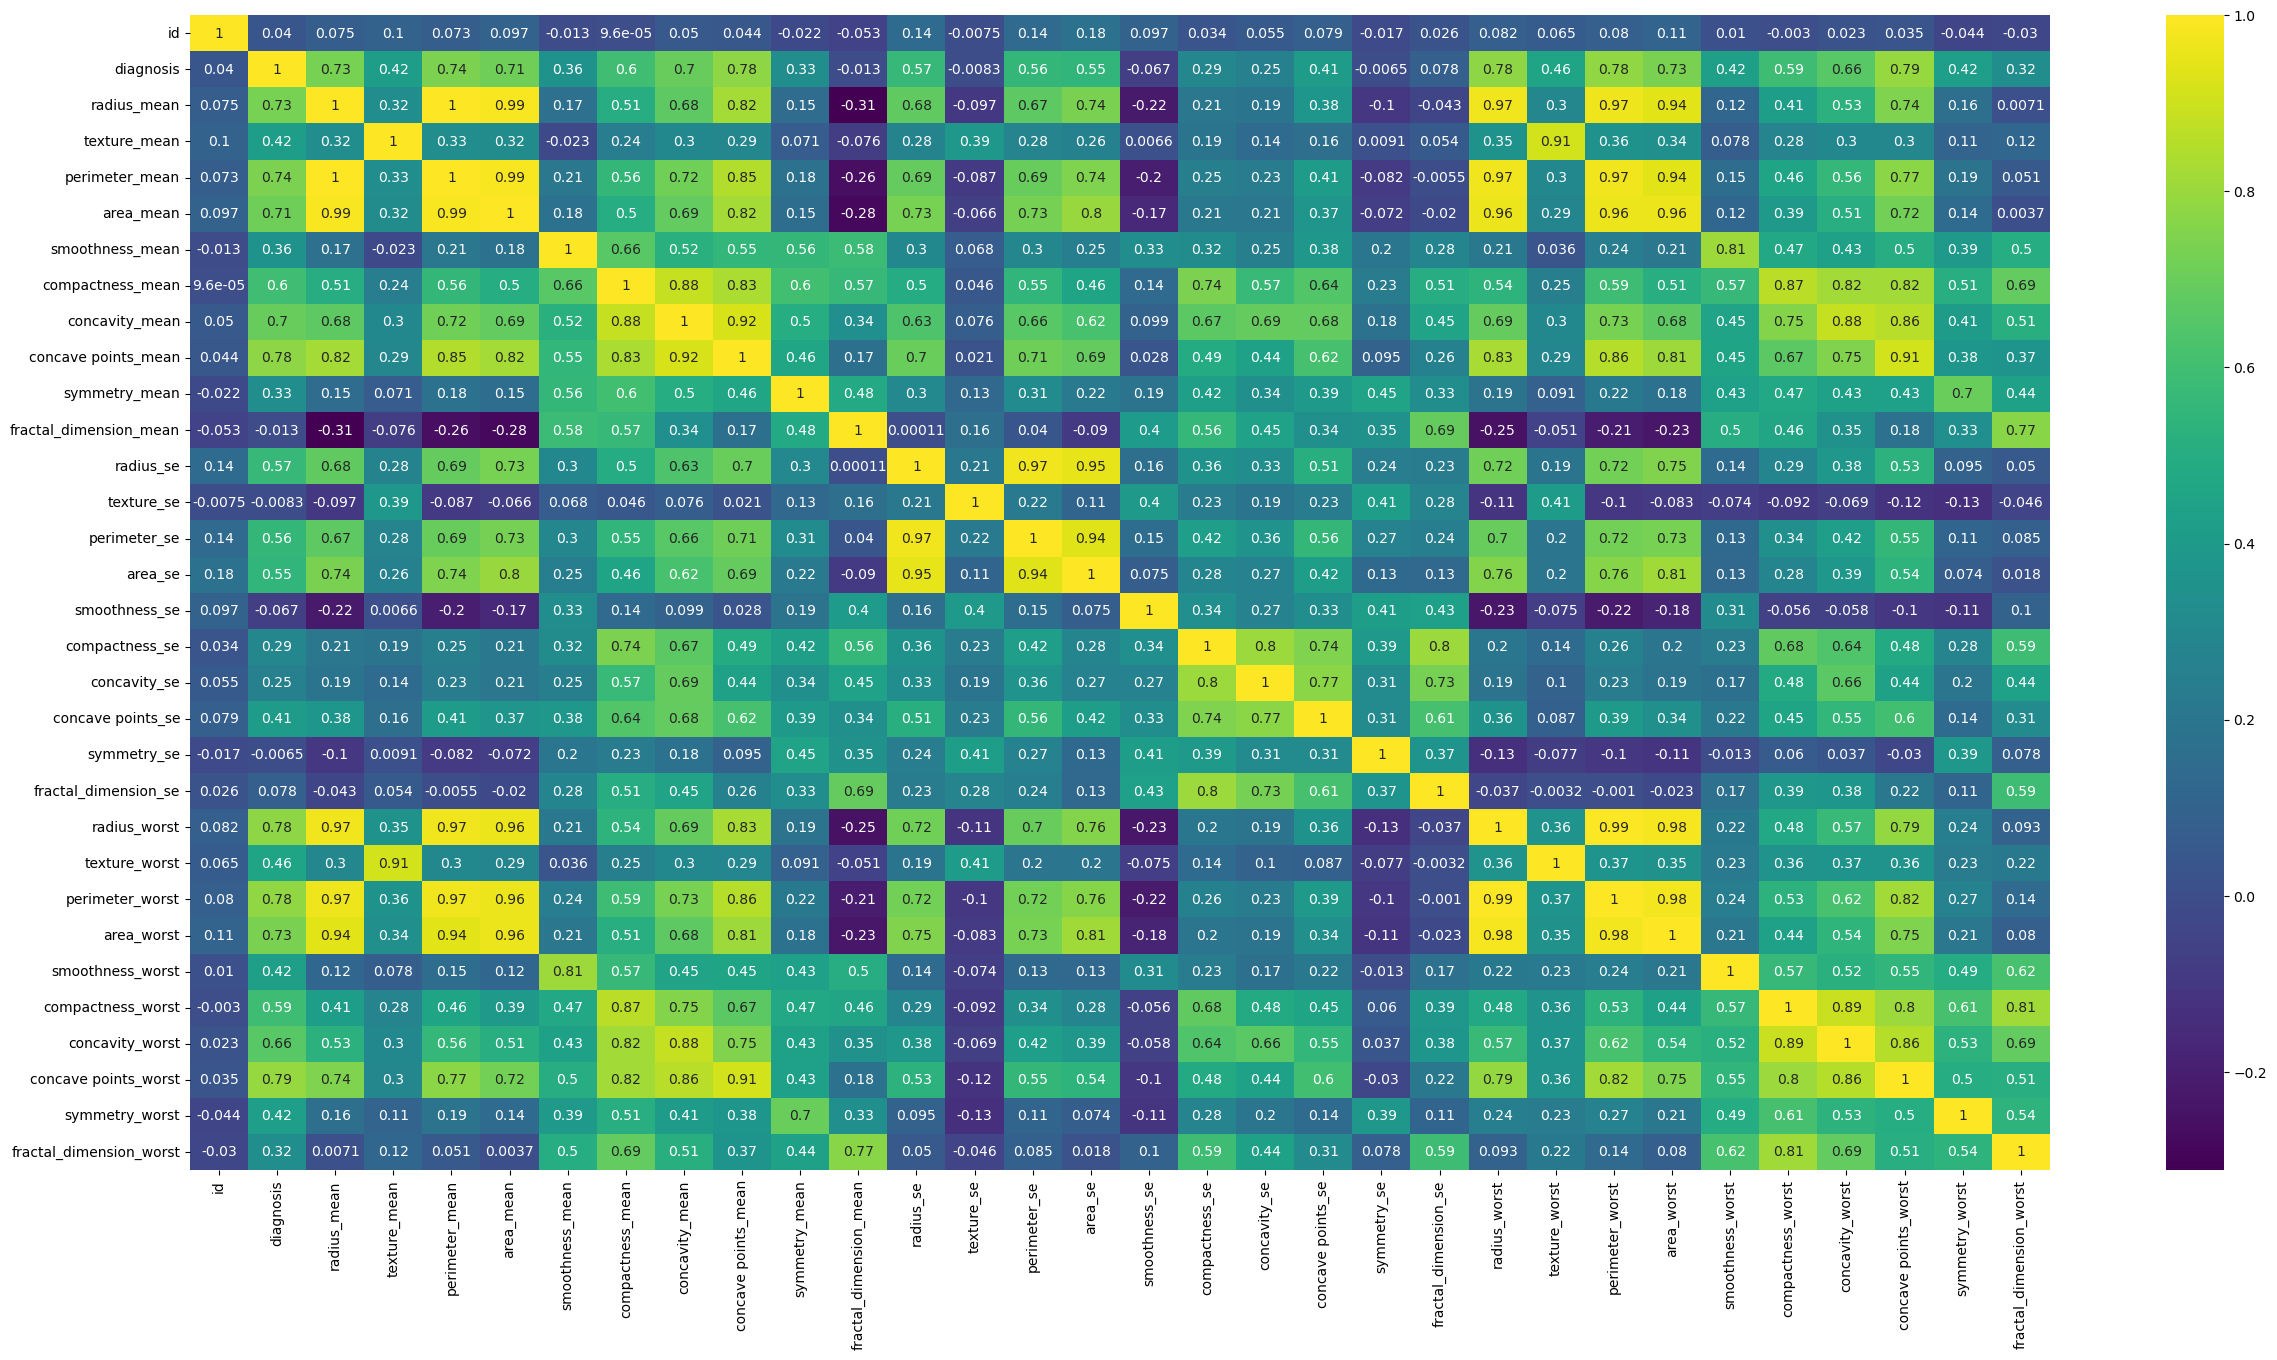

In [10]:
correlation = data.corr()
fig, ax = plt.subplots(figsize=(30,15)) 
clr=sns.color_palette("viridis", as_cmap=True)
sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns,
        cmap=clr,
        annot=True)

# Building our models


In [12]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
#splitting data:

x=data.drop(['id','diagnosis'],axis=1).values
y = data['diagnosis'].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

## Logistic regression

In [14]:
#building our logistic model
modele = LogisticRegression() 
#fitting training data
modele.fit(x_train, y_train)
#predicting  output
pred=modele.predict(x_test)

#score 
print(f"Accuracy: {round(accuracy_score(y_test, pred), 5)}")
print(f"Precision: {round(precision_score(y_test, pred), 5)}")
print(f"Recall: {round(recall_score(y_test, pred), 5)}")
print(f"F1_score: {round(f1_score(y_test, pred), 5)}")

Accuracy: 0.96491
Precision: 0.95745
Recall: 0.95745
F1_score: 0.95745


## KNN

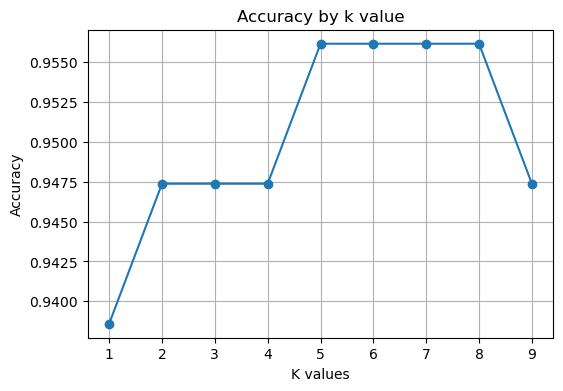

In [15]:
#finding best n_neighbors
accuracies=[]
K=range(1,10)

for k in K:
    knn = KNeighborsClassifier(n_neighbors=k) #knn model
    knn.fit(x_train,y_train)  # Training the model
    y_pred = knn.predict(x_test)   #Predict output
    accuracies.append(round(accuracy_score(y_test, y_pred), 5))

#plot
plt.figure(figsize=(6, 4))
plt.plot(K,accuracies, marker='o', linestyle='-')
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('Accuracy by k value')
plt.grid(True)
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=5) #knn model
knn.fit(x_train,y_train)  # Training the model
y_pred = knn.predict(x_test)   #Predict output

print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 5)}") 
print(f"Precision: {round(precision_score(y_test, y_pred), 5)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 5)}")
print(f"F1_score: {round(f1_score(y_test, y_pred), 5)}")

Accuracy: 0.95614
Precision: 1.0
Recall: 0.89362
F1_score: 0.94382


## Confusion Matrix 1

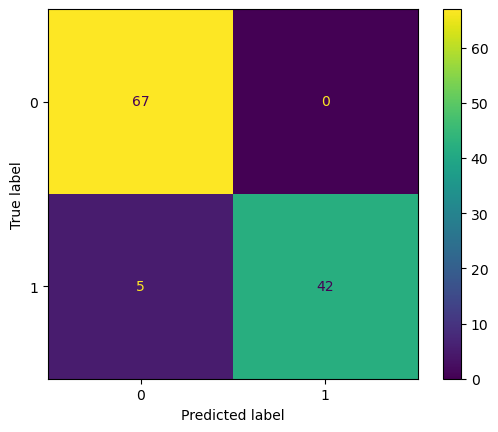

In [17]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Random Forest

### Using Random search method to determine best parameters

In [18]:
#randomForest with best params
kf=KFold(n_splits=5,shuffle=True,random_state=40)
param_grid = {
    'n_estimators': range(100,500,100),
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['log2', 'sqrt',None],
    'bootstrap': [True, False]
}
RF=RandomForestClassifier()
random_search = RandomizedSearchCV(RF, param_grid, cv=kf)
random_search.fit(x_train, y_train) 
best_params_ = random_search.best_params_
print("Best Parameters:", best_params_)

Best Parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'log_loss', 'bootstrap': False}


### Training our model with best parameters

In [19]:
rf_model = RandomForestClassifier(**best_params_)
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)  

print(f"Accuracy: {round(accuracy_score(y_test, y_pred), 5)}") 
print(f"Precision: {round(precision_score(y_test, y_pred), 5)}")
print(f"Recall: {round(recall_score(y_test, y_pred), 5)}")
print(f"F1_score: {round(f1_score(y_test, y_pred), 5)}")

Accuracy: 0.98246
Precision: 0.97872
Recall: 0.97872
F1_score: 0.97872


### Confusion Matrix 2

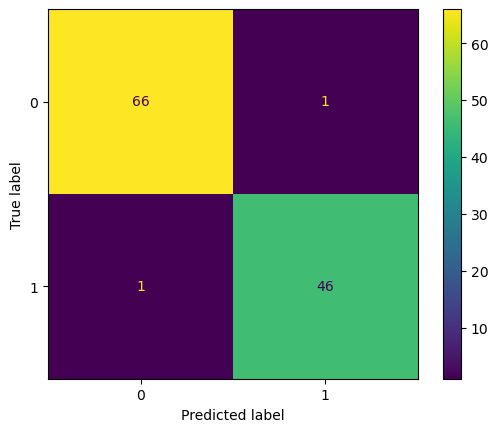

In [20]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Final results :

- <font color="green">Accuracy: **0.98246** </font>
- Precision: **0.97872**
- Recall: **0.97872**
- F1_score: **0.97872**